In [153]:
#load the data into a single matrix for data and single matrix for labels
import numpy as np
import os
import csv
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

def load_data(directory_path):
    # List all CSV files in the directory
    files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    num_files = len(files)
    
    if num_files == 0:
        raise ValueError("No CSV files found in the specified directory.")

    # Initialize arrays to store data and labels
    data = np.zeros((num_files, 40, 50), dtype=np.float32)
    labels = np.zeros((num_files, 1), dtype=np.float32)

    # Read data from each CSV file
    for i, file in enumerate(files):
        file_path = os.path.join(directory_path, file)
        
        try:
            with open(file_path, 'r') as f:
                reader = csv.reader(f)
                # Read data and replace empty cells with zeros
                data[i] = np.nan_to_num(np.array([[float(entry) if entry.strip() else 0.0 for entry in row] for row in reader], dtype=np.float32))
        except ValueError as e:
            print(f"Error reading file '{file}': {e}")
            continue

        # Extract label from file name
        if 'm01' in file:
            labels[i] = 0
        elif 'm03' in file:
            labels[i] = 1
        elif 'm04' in file:
            labels[i] = 2
        else:
            print("Invalid file name:", file)
            labels[i] = 0.0
    
    return data, labels

directory_path = 'combined_norm'
data, labels = load_data(directory_path)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size=0.15, random_state=42)

print("Train data shape:", train_x.shape)
print("Train labels shape:", train_y.shape)
print("Test data shape:", test_x.shape)
print("Test labels shape:", test_y.shape)
print()
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)
print("Train onehot shape:", train_y_onehot.shape)
print("Test onehot shape:", test_y_onehot.shape)


Data shape: (616, 40, 50)
Labels shape: (616, 1)
Train data shape: (523, 40, 50)
Train labels shape: (523, 1)
Test data shape: (93, 40, 50)
Test labels shape: (93, 1)

Train onehot shape: (523, 3)
Test onehot shape: (93, 3)


In [127]:
def load_test_data(directory_path):
    # List all CSV files in the directory
    files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    #files = [file for file in os.listdir(directory_path) if file.startswith('C_') and file.endswith('.csv')]
    num_files = len(files)
    
    if num_files == 0:
        raise ValueError("No CSV files found in the specified directory.")

    # Initialize arrays to store data and labels
    data = np.zeros((num_files, 40, 50), dtype=np.float32)
    labels = np.zeros((num_files, 1), dtype=np.float32)

    # Read data from each CSV file
    for i, file in enumerate(files):
        file_path = os.path.join(directory_path, file)
        
        try:
            with open(file_path, 'r') as f:
                reader = csv.reader(f)
                # Read data and replace empty cells with zeros
                data[i] = np.nan_to_num(np.array([[float(entry) if entry.strip() else 0.0 for entry in row] for row in reader], dtype=np.float32))
        except ValueError as e:
            print(f"Error reading file '{file}': {e}")
            continue
            
        if 'm01' in file:
            labels[i] = 0
        elif 'm03' in file:
            labels[i] = 1
        elif 'm04' in file:
            labels[i] = 2
        else:
            print("Invalid file name:", file)
            labels[i] = 0.0
    
    return data, labels

#molly, labels_molly = load_test_data('molly_norm')
mollyg, labels_mollyg= load_test_data('mollyg_norm')
#noah, labels_noah = load_test_data('normalized_noah')
#concrete, labels_concrete = load_test_data('concrete_norm')
#CelesteAll, labels_CelesteAll = load_test_data('concrete_norm')

#print(noah.shape)

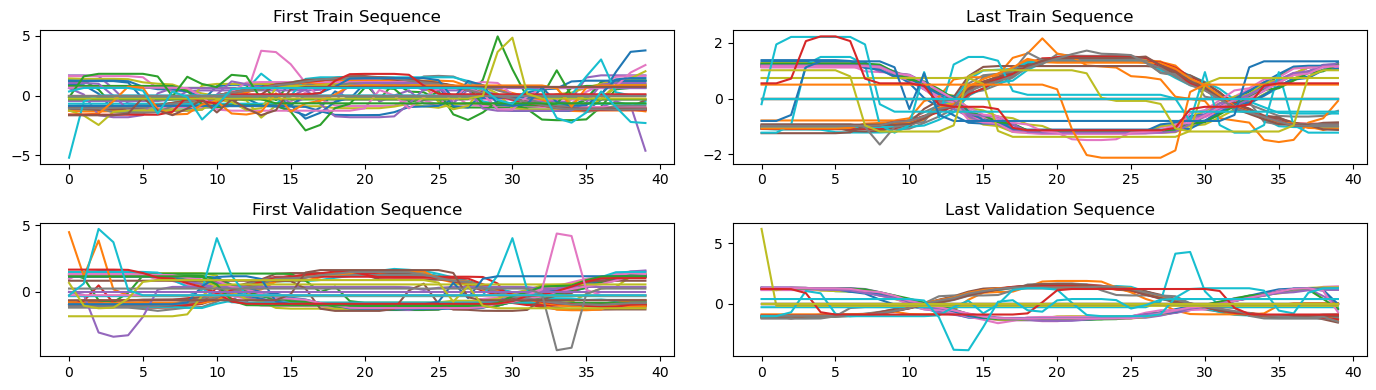

In [16]:
import matplotlib.pyplot as plt
# Plot the first and last sequence in the training and validation sets
plt.figure(figsize = (14,4))
plt.subplot(2,2,1)
plt.plot(train_x[102])
plt.title('First Train Sequence')
plt.subplot(2,2,2)
plt.plot(train_x[27])
plt.title('Last Train Sequence')
plt.subplot(2,2,3)
plt.plot(test_x[2])
plt.title('First Validation Sequence')
plt.subplot(2,2,4)
plt.plot(test_x[4])
plt.title('Last Validation Sequence')
plt.tight_layout()
plt.show()

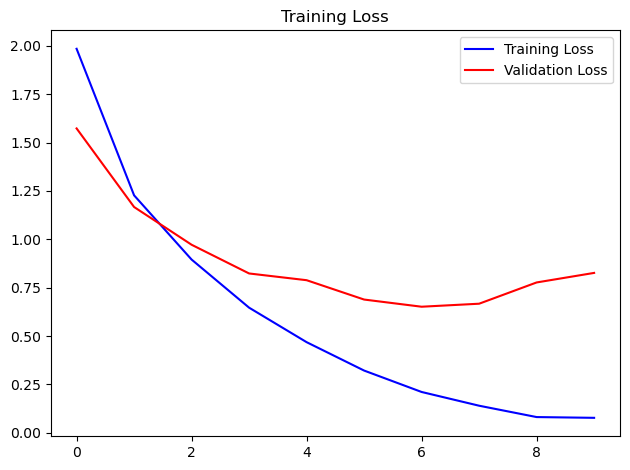

Training loss 0.07737956196069717
Validation loss 0.651685357093811


In [9]:
# Plot the results
plt.figure(1)
plt.plot(history.history['loss'], 'b', label = 'Training Loss')
plt.title('Training Loss')
plt.plot(history.history['val_loss'], 'r', label = 'Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Print the minimum loss
print("Training loss", np.min(history.history['loss']))
print("Validation loss",np.min(history.history['val_loss']))    

Epoch 1/35
21/21 [==============================] - 1s 11ms/step - loss: 1.0853 - accuracy: 0.3595 - val_loss: 1.0028 - val_accuracy: 0.5054
Epoch 2/35
21/21 [==============================] - 0s 4ms/step - loss: 0.9800 - accuracy: 0.5698 - val_loss: 0.9397 - val_accuracy: 0.6022
Epoch 3/35
21/21 [==============================] - 0s 4ms/step - loss: 0.8537 - accuracy: 0.6750 - val_loss: 0.8431 - val_accuracy: 0.6344
Epoch 4/35
21/21 [==============================] - 0s 4ms/step - loss: 0.7365 - accuracy: 0.7151 - val_loss: 0.7645 - val_accuracy: 0.6667
Epoch 5/35
21/21 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.7476 - val_loss: 0.6935 - val_accuracy: 0.7204
Epoch 6/35
21/21 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.7954 - val_loss: 0.6401 - val_accuracy: 0.7634
Epoch 7/35
21/21 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.8528 - val_loss: 0.5845 - val_accuracy: 0.8172
Epoch 8/35
21/21 [=

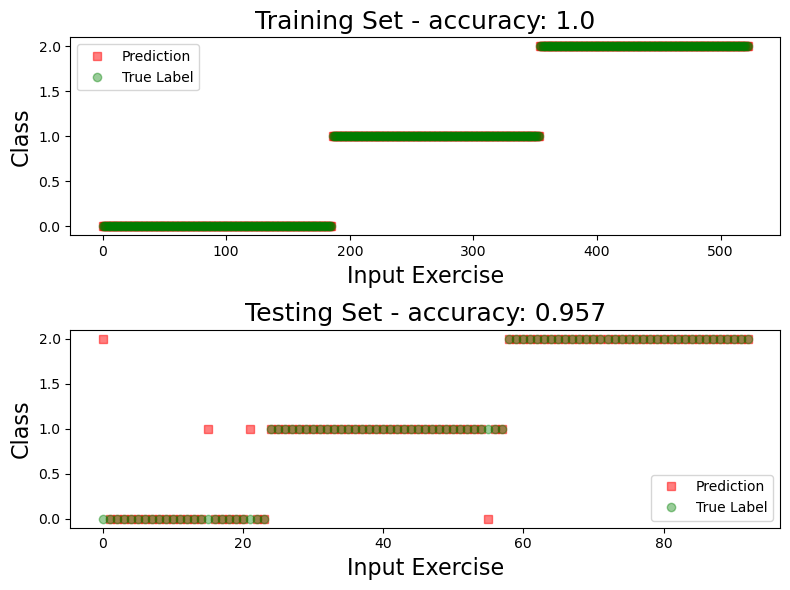

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential([
    LSTM(15, input_shape=(40, 50)),     # LSTM layer with 50 units
    Dense(7, activation='relu'),       # Dense layer with 20 units and ReLU activation
    Dense(3, activation='softmax')     # Output layer with softmax activation for multi-class classification
])

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_x, train_y_onehot, epochs=35, batch_size=25, validation_data=(test_x, test_y_onehot))
loss, te_accuracy = model.evaluate(test_x, test_y_onehot)
loss, tr_accuracy = model.evaluate(train_x, train_y_onehot)

# Sort the train set by lable
train_indices = np.argsort(train_y.flatten(), axis=0)
sorted_train_x = train_x[train_indices]
sorted_train_y = train_y_onehot[train_indices]
tr_y = train_y[train_indices]

# Sort the test set by label
test_indices = np.argsort(test_y.flatten(), axis=0)
sorted_test_x = test_x[test_indices]
sorted_test_y = test_y_onehot[test_indices]
te_y = test_y[test_indices]

# Predictions
pred_train = model.predict(sorted_train_x)
pred_test = model.predict(sorted_test_x)

pred_train_labels = np.argmax(pred_train, axis=1)
pred_test_labels = np.argmax(pred_test, axis=1)


plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(pred_train_labels, 's', color='red', label='Prediction', linestyle='None', alpha=0.5, markersize=6)
plt.plot(tr_y, 'o', color='green', label='True Label', alpha=0.4, markersize=6)
plt.ylim([-0.1, 2.1])  
plt.title(f'Training Set - accuracy: {np.round(tr_accuracy, 3)}', fontsize=18)
plt.xlabel('Input Exercise', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(pred_test_labels, 's', color='red', label='Prediction', linestyle='None', alpha=0.5, markersize=6)
plt.plot(te_y, 'o', color='green', label='True Label', alpha=0.4, markersize=6)
plt.title(f'Testing Set - accuracy: {np.round(te_accuracy, 3)}', fontsize=18)
plt.ylim([-0.1, 2.1])  
plt.xlabel('Input Exercise', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

#model.summary()

In [165]:
print("Validation of Classification of DeepSquat, InlineLunge, SideLunge\n")

print("Noah - correct")
pred_noah = model.predict(noah, verbose=False)
pred_noah = np.argmax(pred_noah, axis=1)
print("model label\t",pred_noah)
print("true  label\t",np.squeeze(labels_noah).astype(int))
print("Accuracy:", np.mean(pred_noah - np.squeeze(labels_noah).astype(int) == 0) * 100)
print()
print("Molly - incorrect")
pred_molly = model.predict(molly, verbose=False)
pred_molly = np.argmax(pred_molly, axis=1)
print("model label\t",pred_molly)
print("true  label\t",np.squeeze(labels_molly).astype(int))
print("Accuracy:", np.mean(pred_molly - np.squeeze(labels_molly).astype(int) == 0) * 100)
print()
print("Molly - correct")
pred_mollyg = model.predict(mollyg, verbose=False)
pred_mollyg = np.argmax(pred_mollyg, axis=1)
print("model label\t",pred_mollyg)
print("true  label\t",np.squeeze(labels_mollyg).astype(int))
print("Accuracy:", np.mean(pred_mollyg - np.squeeze(labels_mollyg).astype(int) == 0) * 100)
print()
print("Celeste - correct only")
pred_concrete = model.predict(concrete, verbose=False)
pred_concrete = np.argmax(pred_concrete, axis=1)
print("model label\t",pred_concrete)
print("true  label\t",np.squeeze(labels_concrete).astype(int))
print("Accuracy:", np.mean(pred_concrete - np.squeeze(labels_concrete).astype(int) == 0) * 100)
print()
print("Celeste - All")
pred_CelesteAll = model.predict(CelesteAll, verbose=False)
pred_CelesteAll = np.argmax(pred_CelesteAll, axis=1)
print("model label\t",pred_CelesteAll)
print("true  label\t",np.squeeze(labels_CelesteAll).astype(int))
print("Accuracy:", np.mean(pred_CelesteAll - np.squeeze(labels_CelesteAll).astype(int) == 0) * 100)

Validation of Classification of DeepSquat, InlineLunge, SideLunge

Noah - correct
model label	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
true  label	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 95.65217391304348

Molly - incorrect
model label	 [2 0 2 0 1 0 2 0 0 0 0 0 1 2 0 1 1 0 0 0 0 0 0]
true  label	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 65.21739130434783

Molly - correct
model label	 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0]
true  label	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 86.36363636363636

Celeste - correct only
model label	 [0 0 0 2 1 2 2 1 0 0 1 0 0 0 1 2 2 2 2 2 1 1 1 1 0 0 1 2 2]
true  label	 [1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 2 2 2 2 2 1 1 1 1 0 0 1 2 2]
Accuracy: 82.75862068965517

Celeste - All
model label	 [0 0 0 0 2 2 1 2 2 1 0 0 1 0 0 0 1 0 2 1 0 2 2 2 2 2 1 1 2 1 1 0 0 1 2 0 0
 0 2 2]
true  label	 [2 1 0 0 1 2 1 0 1 1 0 0 1 1 0 0 1 0 2 0 0 2 2 1 2 2 1 1 2 1 1 0 0 1 0 0 0
 0 2 2]
Accuracy: 77.5


In [164]:
model.save('models/Classv7_78.keras')

In [166]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 15)                3960      
                                                                 
 dense_84 (Dense)            (None, 7)                 112       
                                                                 
 dense_85 (Dense)            (None, 3)                 24        
                                                                 
Total params: 4096 (16.00 KB)
Trainable params: 4096 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
